# Steganography

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Load images

In [2]:
original = np.asarray(imageio.imread("rogerinho.png", as_gray=False, pilmode="RGB"))
secret = np.asarray(imageio.imread("renan.png", as_gray=False, pilmode="RGB"))

Let's take a look at our images.

*Left:* original

*Right:* image to be hidden

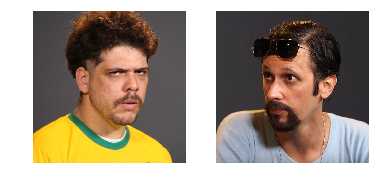

In [3]:
plt.axis('off')
plt.subplot(1,2,1)
plt.imshow(original)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(secret)
plt.axis('off')
plt.show()

Initialize output image

In [4]:
merged = np.copy(original)

Let's merge the images

In [5]:
# merge images
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # get binary representation of pixel (original)
        # we're only interested in RGB
        r, g, b = original[i][j][0:3]
        rgb1 = ('{0:08b}'.format(r), '{0:08b}'.format(g), '{0:08b}'.format(b))
        # get binary representation of pixel (secret)
        r, g, b = secret[i][j][0:3]
        rgb2 = ('{0:08b}'.format(r), '{0:08b}'.format(g), '{0:08b}'.format(b))
        # now, we merge them
        # rg1 and rgb2 are string tuples, let's break them
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        # now we can add the least significant bit of each one
        rgb = (r1[:4] + r2[:4], g1[:4] + g2[:4], b1[:4] + b2[:4])
        # we now have the new pixel for the output image (binary)
        # let's convert it back to int tuple (R,G,B)
        r, g, b = rgb
        merged[i][j] = [int(r, 2), int(g, 2), int(b, 2)]

Let's see if that worked

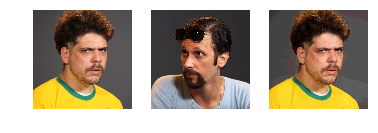

In [7]:
plt.axis('off')
plt.subplot(1,3,1)
plt.imshow(original)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(secret)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(merged)
plt.axis('off')
plt.show()

It's clear we lost some quality, but didn't affect image comprehension. You could sense something is off tho...

Let's try to unmerge the images

In [10]:
# unmerge images
unmerged = np.copy(merged)

for i in range(merged.shape[0]):
    for j in range(merged.shape[1]):
        # get RGB
        r, g, b = merged[i][j][0:3]
        r, g, b = ('{0:08b}'.format(r), '{0:08b}'.format(g), '{0:08b}'.format(b))
        
        # extract last 4 bits (assuming we know it's 4 bits)
        # concatenate remaining bits as 0
        rgb = (r[4:] + "0000", g[4:] + "0000", b[4:] + "0000")
        
        # convert it back to int
        r, g, b = rgb
        unmerged[i][j] = [int(r, 2), int(g, 2), int(b, 2)]
        

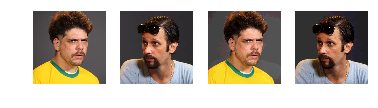

In [11]:
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(original)
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(secret)
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(merged)
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(unmerged)
plt.axis('off')
plt.show()